# Mini-Challenge Michelle Rohrer Part 3

Eine Reise durch Frankreich zu machen, ohne sich die wunderschönen Kirchen anzuschauen ist fast unmöglich. Auf meiner Reise durch Frankreich habe ich zahlreiche Kirche gesehen und auch einige besichtet. An einem Tag habe ich mein Handy vergessen und ich musste das Bild mit der Kamera von meinem Freund machen. Leider hat er eine wirklich schlechte Kamera und das Bild ist sehr verrauscht. Mit dem filtering möchte ich versuchen, das Bild so zu bearbeiten, dass ich es in mein Reisetagebuch einfügen kann.

### Convolution

In [2]:
# 2-D Convolution
import numpy as np

def convolve_2d(image, kernel):
    """
    Diese Funktion führt eine 2D-Konvolution durch.
    
    1. Bild und Kernel (Filter): Das Bild ist die Input-Matrix, und der Kernel ist die Filtermatrix.
    2. Padding: Nullen werden an die Ränder des Bildes hinzugefügt, um die Dimensionen beim Output beizubehalten.
    3. Kernel-Schieben: Der Kernel wird über das Bild "geschoben", und an jeder Position wird die Konvolution durchgeführt.
    4. Ausgabe (Output): Das gefaltete Bild wird als Output zurückgegeben.
    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # notwendige Polsterung für beide Dimension
    pad_y = kernel_height // 2
    pad_x = kernel_width // 2
    
    # Bild mit Nullen polstern -> gibt auch andere Methoden das Bild zu polstern (z.B. mit np.pad)
    padded_image = np.zeros((image_height + 2 * pad_y, image_width + 2 * pad_x))
    padded_image[pad_y:pad_y + image_height, pad_x:pad_x + image_width] = image
    
    # Bild für die Ausgabe
    output = np.zeros_like(image, dtype=np.float32)
    
    # Kernel-Schieben und Konvolution durchführen
    for i in range(image_height):
        for j in range(image_width):
            sum_value = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)
            output[i, j] = sum_value
    
    return output

In [3]:
# Test the function
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

kernel = np.array([[0.1, 0.2, 0.1],
                   [0.2, 0.4, 0.2],
                   [0.1, 0.2, 0.1]])

result = convolve_2d(image, kernel)
print(result)

[[2.1 3.6 3.3]
 [5.2 8.  6.8]
 [5.7 8.4 6.9]]


In [4]:
# Überprüfung des Ergebnisses mit scipy
import scipy.signal
print(scipy.signal.convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0))

[[2.1 3.6 3.3]
 [5.2 8.  6.8]
 [5.7 8.4 6.9]]


### Smoothing Filter

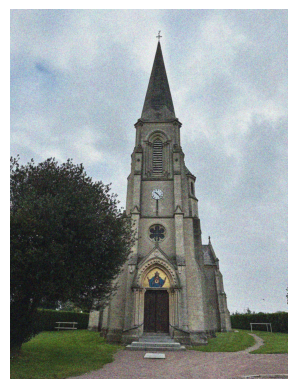

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Bild öffnen
image = Image.open('IMG_1475.jpeg')

# Bild anzeigen
plt.imshow(image)
plt.axis('off') 
plt.show()

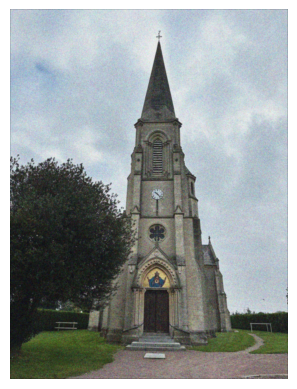

In [6]:
# Medianfilter
median_filter= np.ones((5, 5)) / 25 

# Bild in Numpy-Array umwandeln
image = np.array(image)

# für jedes Farbkanal den Filter anwenden
denoised_image_1 = np.zeros_like(image)
for i in range(3): 
    denoised_image_1[:, :, i] = convolve_2d(image[:, :, i], median_filter)


# Bild anzeigen
plt.imshow(denoised_image_1)
plt.axis('off')
plt.show()

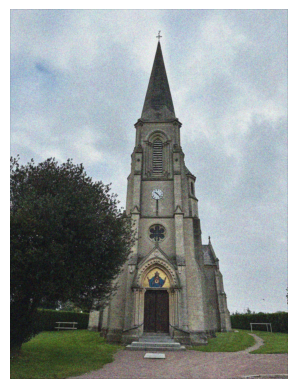

In [7]:
# Gaussian Filter 5x5
gaussian_filter_5x5 = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1] ])

gaussian_filter_5x5 = gaussian_filter_5x5 / np.sum(gaussian_filter_5x5)  # Normierung des Kernels


# für jedes Farbkanal den Filter anwenden      
denoised_image_2 = np.zeros_like(image)
for i in range(3): 
    denoised_image_2[:, :, i] = convolve_2d(image[:, :, i], gaussian_filter_5x5)

# Bild anzeigen
plt.imshow(denoised_image_2)
plt.axis('off')
plt.show()

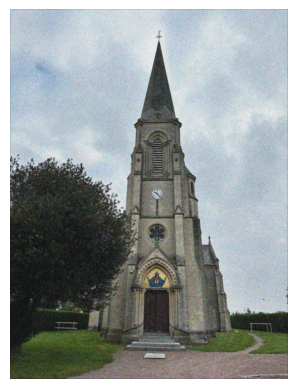

In [8]:
gaussian_filter_7x7 = np.array([[1,  6,  15,  20,  15,  6,  1],
                                [6,  36, 90, 120, 90, 36, 6],
                                [15, 90, 225, 300, 225, 90, 15],
                                [20, 120, 300, 400, 300, 120, 20],
                                [15, 90, 225, 300, 225, 90, 15],
                                [6,  36, 90, 120, 90, 36, 6],
                                [1,  6,  15,  20,  15,  6,  1]])

gaussian_filter_7x7 = gaussian_filter_7x7 / np.sum(gaussian_filter_7x7)  # Normierung des Kernels

# für jedes Farbkanal den Filter anwenden
denoised_image_3 = np.zeros_like(image)
for i in range(3): 
    denoised_image_3[:, :, i] = convolve_2d(image[:, :, i], gaussian_filter_7x7)
    
# Bild anzeigen
plt.imshow(denoised_image_3)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Gausian 7x7')

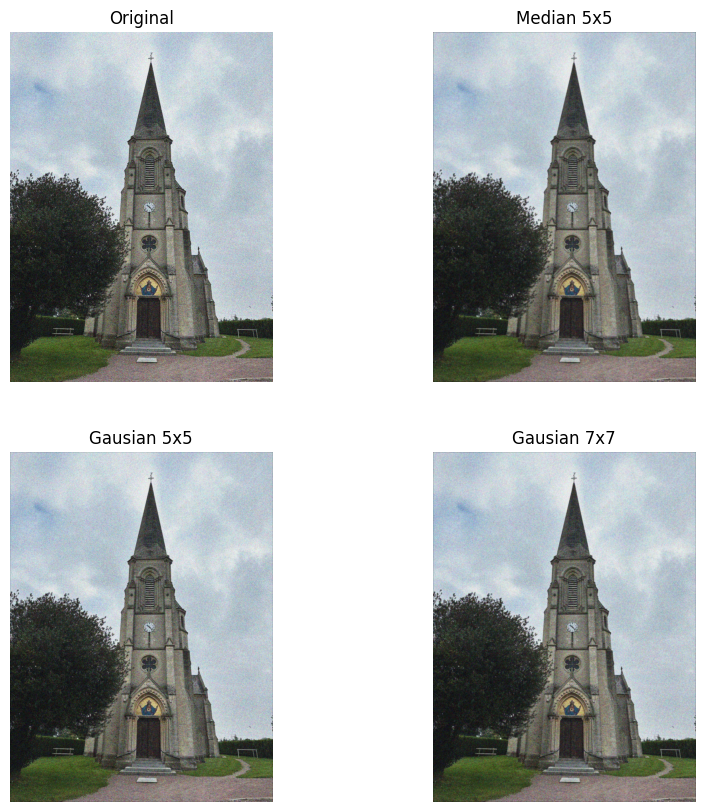

In [9]:
# alle 4 Bilder vergleichen
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(denoised_image_1)
axs[0, 1].axis('off')
axs[0, 1].set_title('Median 5x5')

axs[1, 0].imshow(denoised_image_2)
axs[1, 0].axis('off')
axs[1, 0].set_title('Gausian 5x5')

axs[1, 1].imshow(denoised_image_3)
axs[1, 1].axis('off')
axs[1, 1].set_title('Gausian 7x7')

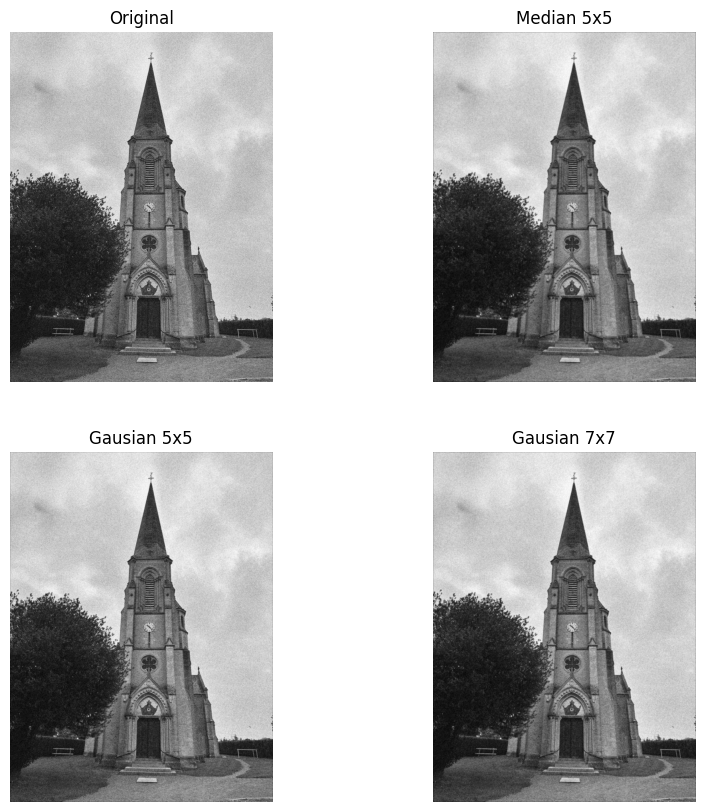

In [10]:
# schwarz-weiß Bild
image_grey = Image.open('IMG_1475.jpeg').convert('L')

image_grey = np.array(image_grey)

#median filter
denoised_image_1 = convolve_2d(np.array(image_grey), median_filter)

#gaussian filter 5x5
denoised_image_2 = convolve_2d(np.array(image_grey), gaussian_filter_5x5)

#gaussian filter 7x7
denoised_image_3 = convolve_2d(np.array(image_grey), gaussian_filter_7x7)

# alle 4 Bilder vergleichen
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image_grey, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(denoised_image_1, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Median 5x5')

axs[1, 0].imshow(denoised_image_2, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Gausian 5x5')

axs[1, 1].imshow(denoised_image_3, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Gausian 7x7')

plt.show()

Man erkennt bei dem Gaussian Filter 7x7 einen optischen Unterschied zum Originalbild. Jedoch bin ich noch nicht komplett überzeugt und möchte nochmals ausprobieren, ob ich es mit erweiterteten denoising Filter noch besser bearbeiten kann. Im Vergleich zum smoothing, wo die Kanten und Details im Bild oft verwischt werden, ist dies beim denoising nicht der Fall.

### Denoising Filter

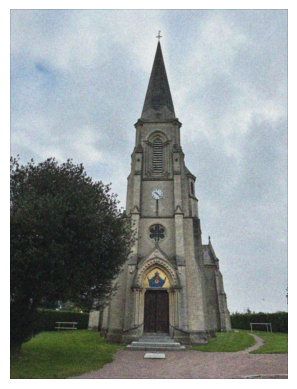

In [11]:
# Wiener Filter
from scipy.signal import wiener

wiener_filter = []
for i in range(3):  # Für R, G, B Kanäle
    filtered_channel = wiener(image[:, :, i], mysize=5, noise=0.001)
    wiener_filter.append(filtered_channel)
    
# Wieder zu einem Bild zusammensetzen
wiener_image_1 = np.stack(wiener_filter, axis=2).astype(np.uint8)

# Bild anzeigen
plt.imshow(wiener_image_1)
plt.axis('off')
plt.show()

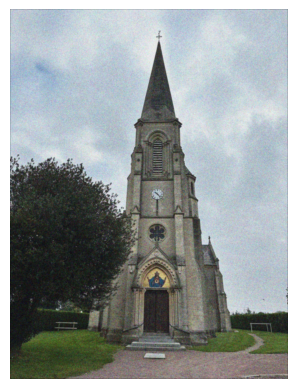

In [12]:
# wiener filter
wiener_filter = []
for i in range(3):  # Für R, G, B Kanäle
    filtered_channel = wiener(image[:, :, i], mysize=5, noise=0.1)
    wiener_filter.append(filtered_channel)
    
# Wieder zu einem Bild zusammensetzen
wiener_image_2 = np.stack(wiener_filter, axis=2).astype(np.uint8)

# Bild anzeigen
plt.imshow(wiener_image_2)
plt.axis('off')
plt.show()

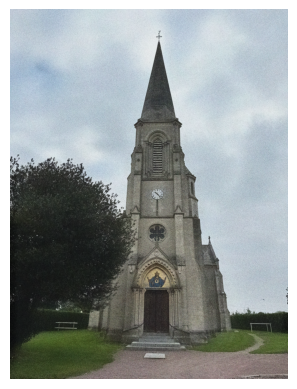

In [13]:
# bilateral filter
from skimage.restoration import denoise_bilateral

bilateral_image = denoise_bilateral(image, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)

# Bild anzeigen
plt.imshow(bilateral_image)
plt.axis('off')
plt.show()                       

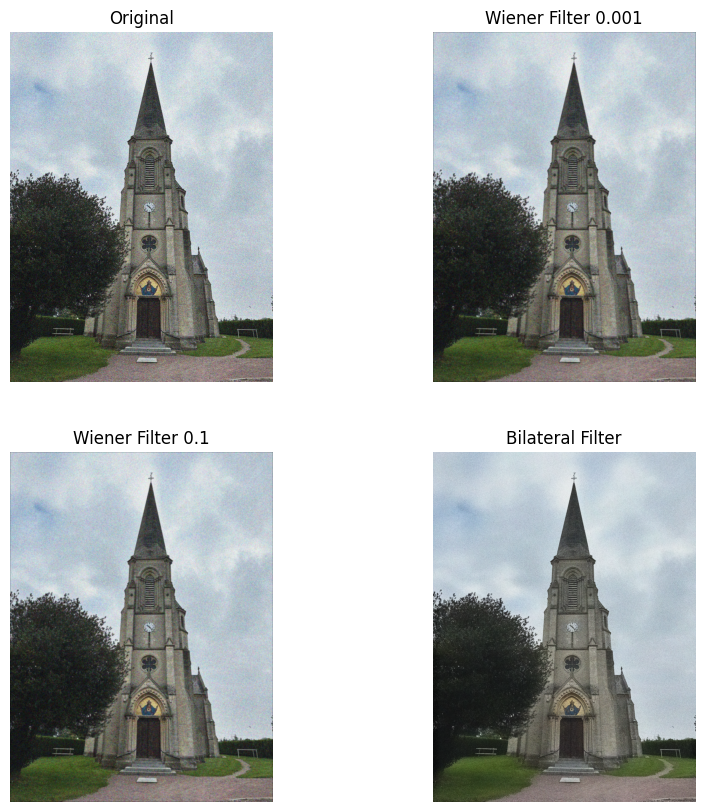

In [14]:
# alle 4 Bilder vergleichen
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(wiener_image_1)
axs[0, 1].axis('off')
axs[0, 1].set_title('Wiener Filter 0.001')

axs[1, 0].imshow(wiener_image_2)
axs[1, 0].axis('off')
axs[1, 0].set_title('Wiener Filter 0.1')

axs[1, 1].imshow(bilateral_image)
axs[1, 1].axis('off')
axs[1, 1].set_title('Bilateral Filter')

plt.show()

Um meine Bilder nicht nur optisch zu vergleichen, werde ich das Rauschen der Bilder im Detail analysieren. Oft sind optische Unterschiede nur gering, und es ist nicht immer ersichtlich, welches Bild tatsächlich besser ist. Um eine genauere Antwort zu erhalten, werde ich eine Heatmap erstellen, welches die Varianz innerhalb der verschiedenen Bildbereiche darstellt. So kann ich Unterschiede im Rauschen besser sichtbar machen und bewerten, welche Methode die beste Qualität liefert.

#### Auswertung

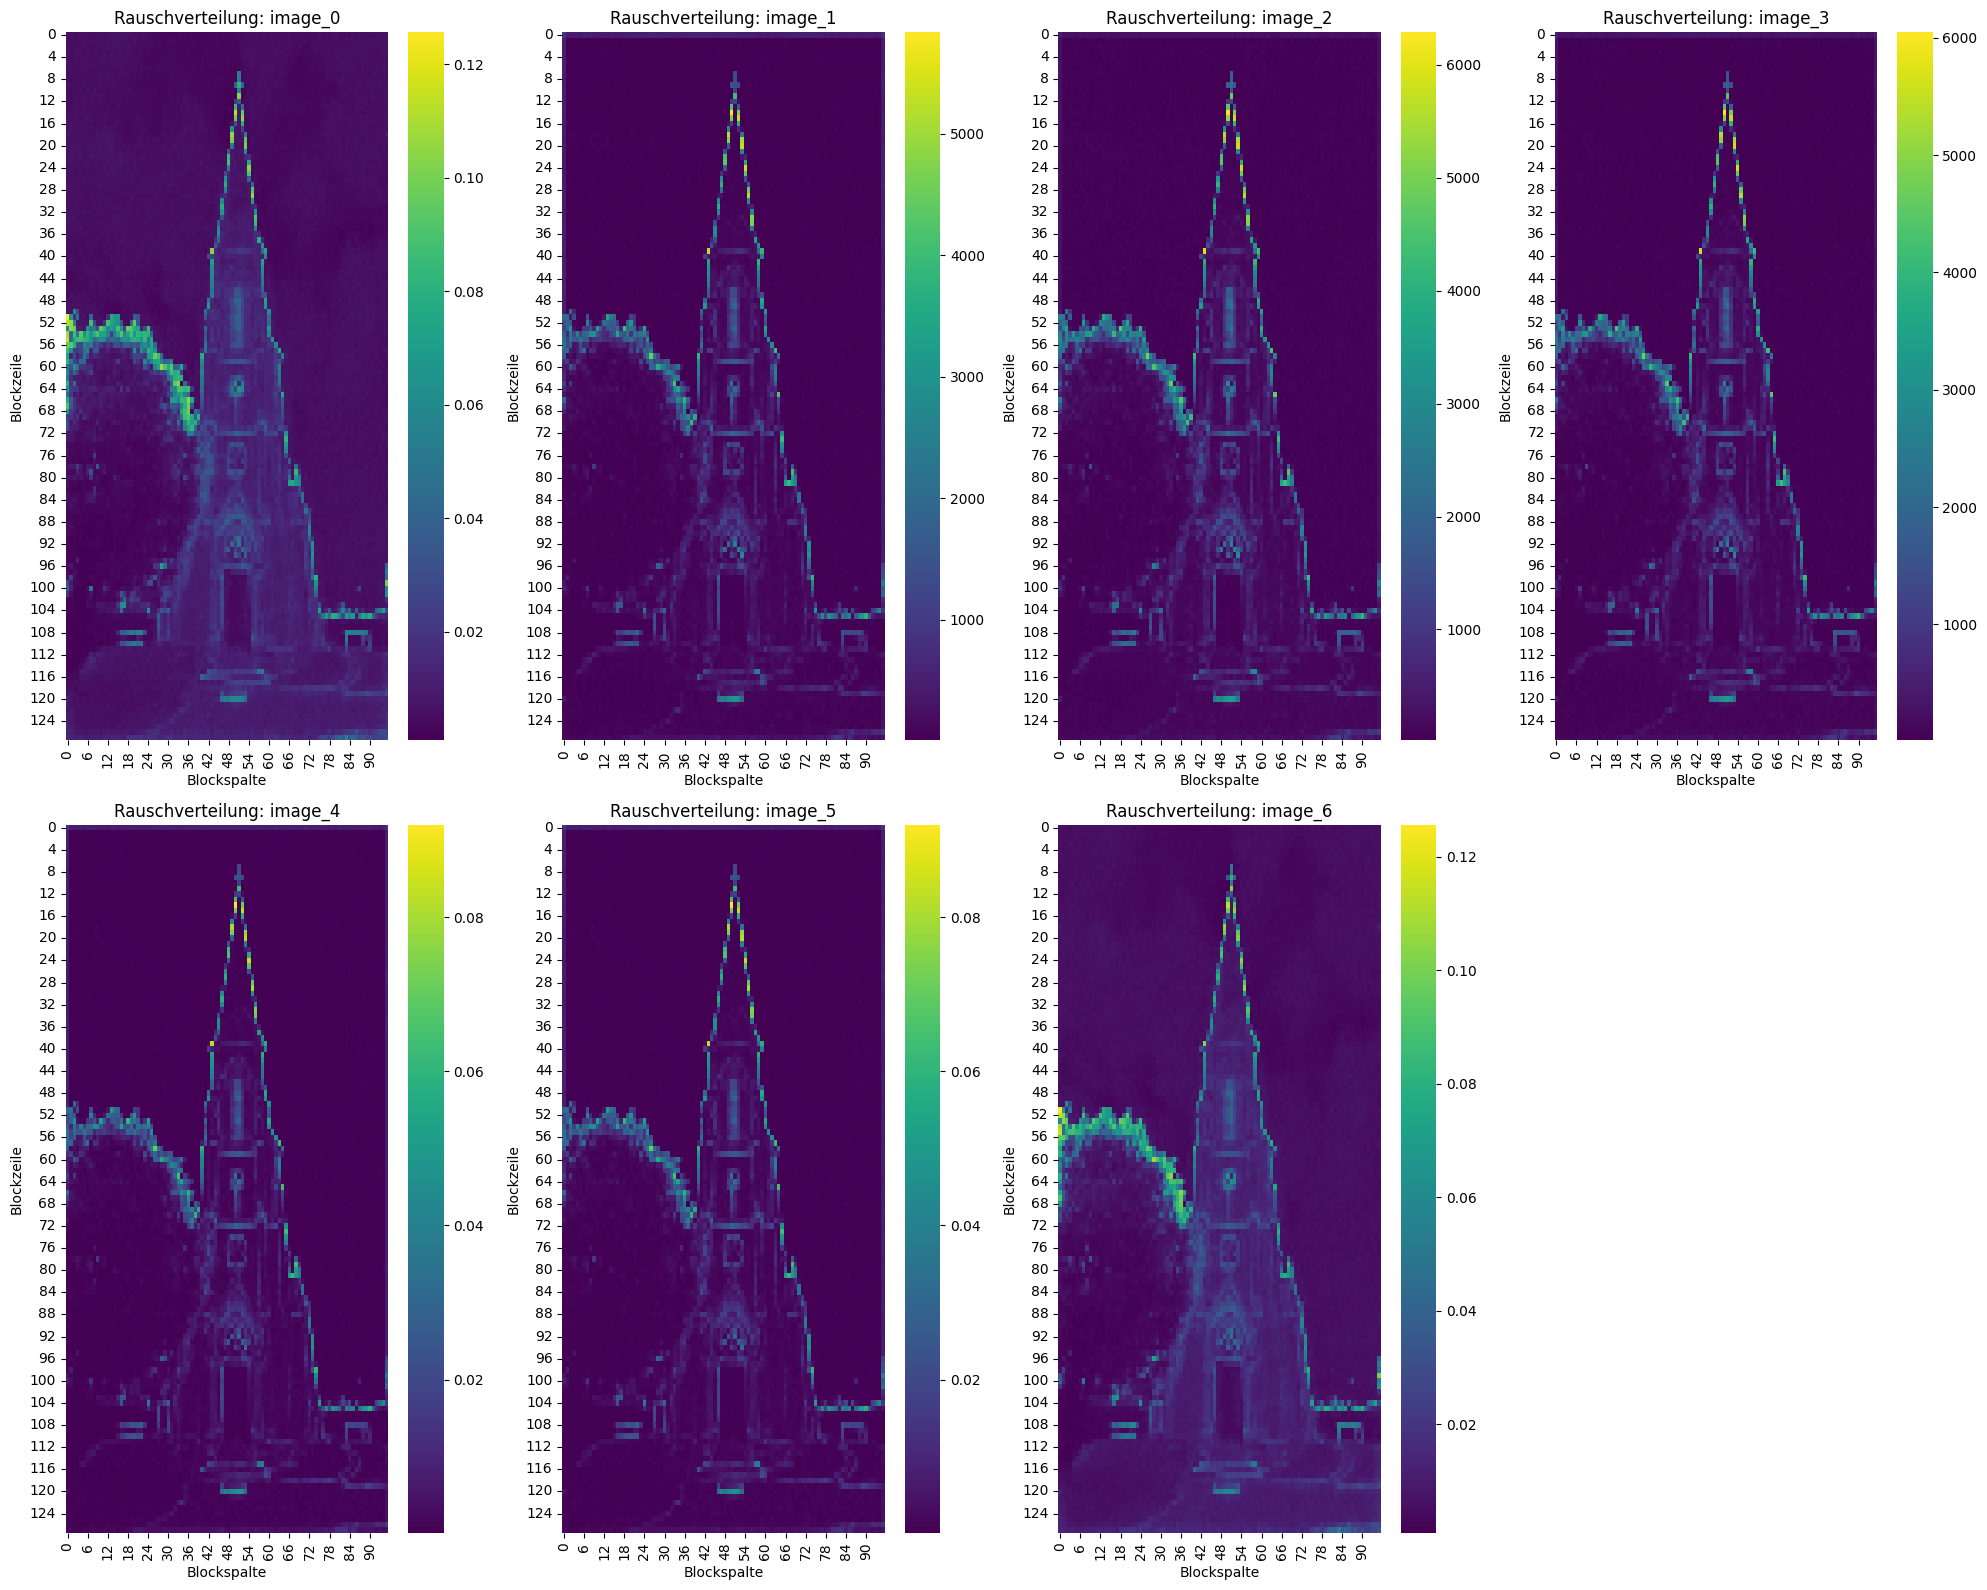

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

block_size = 16
variance_maps = {}

images = [image, denoised_image_1, denoised_image_2, denoised_image_3, wiener_image_1, wiener_image_2, bilateral_image]

for idx, img in enumerate(images):
    if len(img.shape) == 3:
        img = np.mean(img, axis=2)
        
    name = f'image_{idx}'
    height, width = img.shape

    variance_map = np.zeros((height // block_size, width // block_size))

    # Berechnung der Varianz in jedem Block
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = img[i:i + block_size, j:j + block_size]
            variance = np.var(block)
            variance_map[i // block_size, j // block_size] = variance
    variance_maps[name] = variance_map


num_images = len(variance_maps)
fig, axes = plt.subplots(2, 4, figsize=(20, 16))
axes = axes.ravel()

for idx, (name, variance_map) in enumerate(variance_maps.items()):
    sns.heatmap(variance_map, cmap='viridis', annot=False, ax=axes[idx])
    axes[idx].set_title(f'Rauschverteilung: {name}')
    axes[idx].set_xlabel('Blockspalte')
    axes[idx].set_ylabel('Blockzeile')
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Die Bildbereiche in der Nähe der Kantenhaben haben tendenziell eine höhere Varianz. Das liegt daran, dass sich Rauschen in diesen Bereichen stärker bemerkbar macht, wenn es die Struktur stört.
Die letzten drei Bilder (Wiener-Filter und Bilateral Filter) haben sehr niedrige Varianzwerte. Dies deutet daraufhon, dass die Filter am besten das Rauschen reduziert haben, möglicherweise aber auch wichtige Details verloren gingen, weshalb ich zu diesen Bildern noch die SSIM und PSNR zu vergleichen, um sicherzustellen, dass nicht zu viele Details verloren gegangen sind.

In [43]:
# PSNR berechnen (Wiener Filter und Bilateral Filter)
from skimage.metrics import peak_signal_noise_ratio as psnr

psnr_wiener_1 = psnr(image, wiener_image_1)
psnr_wiener_2 = psnr(image, wiener_image_2)
psnr_bilateral = psnr(image, bilateral_image)

print(f'PSNR Wiener Filter 0.001: {psnr_wiener_1:.2f} dB')
print(f'PSNR Wiener Filter 0.1: {psnr_wiener_2:.2f} dB')
print(f'PSNR Bilateral Filter: {psnr_bilateral:.2f} dB')

# SSIM berechnen (Wiener Filter und Bilateral Filter)
from skimage.metrics import structural_similarity as ssim

data_range = image.max() - image.min()
ssim_wiener_1 = ssim(image, wiener_image_1, multichannel=False, win_size=3, data_range=data_range)
ssim_wiener_2 = ssim(image, wiener_image_2, multichannel=False, win_size=3, data_range=data_range)
ssim_bilateral = ssim(image, bilateral_image, multichannel=False, win_size=3, data_range=data_range)

print(f'SSIM Wiener Filter 0.001: {ssim_wiener_1:.2f}')
print(f'SSIM Wiener Filter 0.1: {ssim_wiener_2:.2f}')
print(f'SSIM Bilateral Filter: {ssim_bilateral:.2f}')

PSNR Wiener Filter 0.001: 20.86 dB
PSNR Wiener Filter 0.1: 20.86 dB
PSNR Bilateral Filter: inf dB
SSIM Wiener Filter 0.001: 0.35
SSIM Wiener Filter 0.1: 0.35
SSIM Bilateral Filter: 1.00


Bilateral Filter:
>Der Bilateral Filter hat das Bild so weit geglättet, dass es fast vollständig wie das Original wirkt, was durch den PSNR-Wert von inf und den SSIM von 1.0 bestätigt wird, Das deutet auf eine sehr starke Glättung hin, die das Rauschen vollständig entfernt hat.

Wiener Filter:
>Der Wiener Filter konnte das Rauschen reduzieren, jedoch nur mäßig, da der PSNR-Wert relativ niedrig ist (20.86 dB) und der SSIM ebenfalls nicht besonders hoch ausfällt (0.35). Das bedeutet, dass noch sichtbares Rauschen vorhanden ist und einige Details verloren gegangen sein könnten.
Die Anpassung des Parameters (0.001 vs. 0.1) hatte keine signifikante Wirkung.

#### Schlussbewertung

Ich habe versucht, das Rauschen in meinem Bild der Kirche zu reduzieren, um es in mein Fototagebuch aufzunehmen. Dabei habe ich verschiedene Filtermethoden angewendet, wobei ich mich auf Glättung (Smoothing) und Rauschunterdrückung (Denoising) konzentriert habe.

1. Zunächst habe ich Medianfilter und Gaußfilter getestet, wobei ich den Gaußfilter in verschiedenen Größen angewendet habe. Beide Methoden glätten das Bild, erhalten jedoch Details und Kanten relativ gut. Optisch war es allerdings sehr schwierig, Unterschiede zu erkennen. Ich habe mehrere Personen befragt, und nur eine von ihnen konnte das Bild mit der besten Qualität (d.h. am wenigsten Rauschen) identifizieren. Auch die Heatmaps zeigen, dass die Varianz zwischen den Bildern relativ hoch ist.

2. Wiener- und Bilateralfilter sind adaptive Filter, die sich an die lokalen Bildstrukturen anpassen. Diese beiden Filter reduzieren das Rauschen deutlich stärker, allerdings kann dabei auch feine Detailinformation verloren gehen. Der Unterschied zwischen diesen Filtern war optisch deutlicher zu erkennen, insbesondere zeigte das Bild mit dem Bilateralfilter eine starke Glättung. Zwischen den Wienerfiltern gab es nur leichte optische Unterschiede. Hier hätte ich noch mehr mit den Parametern experimentieren können, da die Heatmap keinen signifikanten Unterschied zeigt. In der Analyse wurde klar, dass der Bilateralfilter am besten abgeschnitten hat, da er dem Originalbild am ähnlichsten war. Allerdings vermute ich, dass bei der Heatmap des Originalbildes ein Fehler aufgetreten ist, da diese nahezu kein Rauschen anzeigt, was nicht realistisch erscheint. Leider konnte ich den Fehler nicht finden, weshalb ich nicht mit Sicherheit sagen kann, dass beim Bilateralfilter keine Details verloren gegangen sind.

Ich bin mit den Ergebnissen der Glättung nicht so zufriedne, jedoch gefällt mir das Bild mit dem Bilateralfikter sehr gut und ich werde es in mein Fotobuch einfügen. Es ist das einzige Bild, was ich von einer Kirche gemacht habe und es war mir wirklich wichtig, es in mein Fotobuch zu haben. Die Kirchen in Frankreich sind alle so wunderschön und wirklich jedes kleine Dorf besitzt eine einzigartige Kirche.

Funfact: Frankreich ist das Land mit den meisten Kirchen in Europa! Es gibt etwa 45.000 Kirchen im ganzen Land.

(Der Text wurde mit Perplexity überarbeitet)